In [1]:
#необходимые import

import numpy as np
from math import pi,log
from scipy.optimize import fsolve
from decimal import Decimal
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#константы
k_rwo=0.6
n_w = 2
S_wr = 0.2
S_or = 0.2
k_roo = 1
n_0 = 2
ro_w = 2
ro_o = 2
r_w = 0.1
lngth = 100
dx = 10
k = 1
nu_w = 10**(-3)
nu_o = 10**(-2)
S_wo = np.array([0.6]*lngth)
rc = 0.14*dx/(2)**0.5
rw = 0.1
c = 2*pi*dx/log(rc/rw)
n_w = 2
n_o = 2


In [2]:
#функции для определения констант 
def return_phi(count_of_st):
    return

def krwi(P, S_wn1, S_wn, i):
    return k_rwo*((S_wn1[i]-S_wr)/(1-S_wr-S_or))**n_w


def np_krwi(P, S_wn1, S_wn):
    return k_rwo*((S_wn1-S_wr)/(1-S_wr-S_or))**n_w


def kroi(P, S_wn1, S_wn, i):
    return k_roo*((1-S_wn1[i]-S_or)/(1-S_wr-S_or))**n_o

def np_kroi(P, S_wn1, S_wn):
    return k_roo*((1-S_wn1-S_or)/(1-S_wr-S_or))**n_o

def dkrwi(P, S_wn1, S_wn, i):
    return k_rwo*n_w/(1-S_wr-S_or)**n_w * (S_wn1[i]-S_wr)**(n_w-1)

def dkroi(P, S_wn1, S_wn, i):
    return -k_roo*n_o/(1-S_wr-S_or)**n_o * (1-S_wn1[i]-S_or)**(n_o-1)

def np_dkrwi(P, S_wn1, S_wn):
    return k_rwo*n_w/(1-S_wr-S_or)**n_w * (S_wn1-S_wr)**(n_w-1)

def np_dkroi(P, S_wn1, S_wn):
    return -k_roo*n_o/(1-S_wr-S_or)**n_o * (1-S_wn1-S_or)**(n_o-1)

def phi_gener(lst, lenn):
    phi = np.zeros(lenn)
    if lenn/len(lst) == lenn//len(lst):
        for i in range(len(lst)):
            phi[(lenn//len(lst))*i:(lenn//len(lst))*(i+1)] = lst[i]
    else:
        for i in range(len(lst)-1):
            phi[(lenn//len(lst))*i:(lenn//len(lst))*(i+1)] = lst[i]
        print(i)
        phi[(lenn//len(lst))*(i+1):] = lst[i+1]
    return phi
len(phi)

In [57]:
#невязка
def resid(x,S_wn):
    P = x[:lngth].astype(float)
    S_wn1 = x[lngth:].astype(float)
    N=lngth
    qw=np.zeros(lngth,dtype=float)
    qo = np.zeros(lngth,dtype=float)
    qw[0] = c*krwi(P, S_wn1, S_wn, 0)/nu_w * (4100-P[0])
    qw[-1]  = c*krwi(P, S_wn1, S_wn, -1)/nu_w * (3900-P[-1])
    qo[0] = 0
    qo[-1]  = c*kroi(P, S_wn1, S_wn, -1)/nu_o * (3900-P[-1])
    F=np.zeros(2*N,dtype=float)
    eq1=np.array([0]*lngth,dtype=float)
    eq2=np.array([0]*lngth,dtype=float)
    eq1[0] = dx**3 * phi[0] * (S_wn1[0] - S_wn[0]) / dt - dx**2 * k / nu_w * ((P[1] - P[0]) * krwi(P, S_wn1, S_wn, 0)) / dx - dx**3 * ((qw[0]) / ro_w)
    eq2[0] = dx**2 * k * ((P[1]-P[0])/dx)*((krwi(P, S_wn1, S_wn, 0))/nu_w+(kroi(P, S_wn1, S_wn, 0)/nu_o)) +dx**3*(qw[0]/ro_w+qo[0]/ro_o)
    eq1[-1] = dx**3 * phi[-1] * (S_wn1[-1] - S_wn[-1]) / dt  - dx**3 * ((qw[-1]) / ro_w) - dx**2 * k / nu_w * (- (P[-1] - P[-2]) * krwi(P, S_wn1, S_wn, -2) / dx)
    eq2[-1] = dx**2 * k * (-((P[-1]-P[-2])/dx)*(krwi(P, S_wn1, S_wn, -2)/nu_w+kroi(P, S_wn1, S_wn, -2)/nu_o))+dx**3*(qw[-1]/ro_w+qo[-1]/ro_o)
    for i in range(1, 99):
        eq1[i]= dx**3 * phi[i] * (S_wn1[i] - S_wn[i]) / dt - dx**2 * k / nu_w * (((P[i+1] - P[i]) * krwi(P, S_wn1, S_wn, i)) / dx - (P[i] - P[i-1]) * krwi(P, S_wn1, S_wn, i-1) / dx)- dx**3 * ((qw[i]) / ro_w)
        eq2[i]= dx**2 * k * (((P[i+1]-P[i])/dx)*((krwi(P, S_wn1, S_wn, i))/nu_w+(kroi(P, S_wn1, S_wn, i)/nu_o))-((P[i]-P[i-1])/dx)*(krwi(P, S_wn1, S_wn, i-1)/nu_w+kroi(P, S_wn1, S_wn, i-1)/nu_o))+dx**3*(qw[i]/ro_w+qo[i]/ro_o)
    return np.concatenate((eq1,eq2), axis=None)


print(resid)



<function resid at 0x78e7cb4e11b0>


In [3]:
#векторизованная невязка
def vector_resid(x,S_wn, dt, phi):
    P = x[:lngth].astype(float)
    S_wn1 = x[lngth:].astype(float)
    N=lngth
    qw=np.zeros(lngth,dtype=float)
    qo = np.zeros(lngth,dtype=float)
    qw[0] = c*krwi(P, S_wn1, S_wn, 0)/nu_w * (4100-P[0])
    qw[-1]  = c*krwi(P, S_wn1, S_wn, -1)/nu_w * (3900-P[-1])
    qo[0] = 0
    qo[-1]  = c*kroi(P, S_wn1, S_wn, -1)/nu_o * (3900-P[-1])
    F=np.zeros(2*N,dtype=float)
    eq1=np.array([0]*lngth,dtype=float)
    eq2=np.array([0]*lngth,dtype=float)
    eq1[0] = dx**3 * phi[0] * (S_wn1[0] - S_wn[0]) / dt - dx**2 * k / nu_w * ((P[1] - P[0]) * krwi(P, S_wn1, S_wn, 0)) / dx - dx**3 * ((qw[0]) / ro_w)
    eq2[0] = dx**2 * k * ((P[1]-P[0])/dx)*((krwi(P, S_wn1, S_wn, 0))/nu_w+(kroi(P, S_wn1, S_wn, 0)/nu_o)) +dx**3*(qw[0]/ro_w+qo[0]/ro_o)
    eq1[-1] = dx**3 * phi[-1] * (S_wn1[-1] - S_wn[-1]) / dt  - dx**3 * ((qw[-1]) / ro_w) - dx**2 * k / nu_w * (- (P[-1] - P[-2]) * krwi(P, S_wn1, S_wn, -2) / dx)
    eq2[-1] = dx**2 * k * (-((P[-1]-P[-2])/dx)*(krwi(P, S_wn1, S_wn, -2)/nu_w+kroi(P, S_wn1, S_wn, -2)/nu_o))+dx**3*(qw[-1]/ro_w+qo[-1]/ro_o)

    eq1[1:lngth-1]= dx**3 * phi[1:lngth-1] * (S_wn1[1:lngth-1] - S_wn[1:lngth-1]) / dt - dx**2 * k / nu_w * (((P[2:lngth] - P[1:lngth-1]) * np_krwi(P, S_wn1, S_wn)[1:lngth-1]) / dx - (P[1:lngth-1] - P[0:lngth-2]) * np_krwi(P, S_wn1, S_wn)[0:lngth-2] / dx)- dx**3 * ((qw[1:lngth-1]) / ro_w)
    eq2[1:lngth-1]= dx**2 * k * (((P[2:lngth]-P[1:lngth-1])/dx)*((np_krwi(P, S_wn1, S_wn)[1:lngth-1])/nu_w+(np_kroi(P, S_wn1, S_wn)[1:lngth-1]/nu_o))-((P[1:lngth-1]-P[0:lngth-2])/dx)*(np_krwi(P, S_wn1, S_wn)[0:lngth-2]/nu_w+np_kroi(P, S_wn1, S_wn)[0:lngth-2]/nu_o))+dx**3*(qw[1:lngth-1]/ro_w+qo[1:lngth-1]/ro_o)



    return np.concatenate((eq1,eq2), axis=None)
#определяем поток 
def qo_func(x, S_wn):
    P = x[:lngth].astype(float)
    S_wn1 = x[lngth:].astype(float)
    return c*kroi(P, S_wn1, S_wn, -1)/nu_o * (3900-P[-1])




In [ ]:
#Якобиан
def jacobian(x, S_wn):
    P = x[:100].astype(float)
    S_wn1 = x[100:].astype(float)
    qw=np.zeros(100,dtype=float)
    eq1=np.zeros((200,200),dtype=float)
    eq1[0][0] = dx * k / nu_w * krwi(P, S_wn1, S_wn, 0) - dx**3 * c * krwi(P, S_wn1, S_wn, 0)/(nu_w*ro_w)
    eq1[0][-1] = dx *  k / nu_w * krwi(P, S_wn1, S_wn, -2)- dx**3 * c * krwi(P, S_wn1, S_wn, -1)/(nu_w*ro_w)
    eq1[1][0] = - dx * k * (krwi(P, S_wn1, S_wn, 0)/nu_w + kroi(P, S_wn1, S_wn, 0)/nu_o) + dx**3* (c * krwi(P, S_wn1, S_wn, 0)/(nu_w*ro_w))
    eq1[1][-1] = - dx * k * (krwi(P, S_wn1, S_wn, -2)/nu_w + kroi(P, S_wn1, S_wn, -2)/nu_o) - dx**3 * c * (krwi(P, S_wn1, S_wn, -2)/(ro_w*nu_w) + kroi(P, S_wn1, S_wn, -2)/(ro_o*nu_o))
    for j in range(1,99):
          for i in range(1,100):
              eq1[j][i] = dx*k/nu_w * (krwi(P, S_wn1, S_wn, i) + krwi(P, S_wn1, S_wn, i-1))
              eq1[j+100][i] = - dx * k * (krwi(P, S_wn1, S_wn, i)/nu_w + kroi(P, S_wn1, S_wn, i)/nu_o + krwi(P, S_wn1, S_wn, i-1)/nu_w + kroi(P, S_wn1, S_wn, i-1)/nu_o)
          for i in range(100,199):
              eq1[j][i] = dx**3 * phi[i] /dt - dx*k * ((P[i+1]-P[i])*(dkrwi(P, S_wn1, S_wn, i)/nu_w) - (P[i]-P[i-1])*(dkrwi(P, S_wn1, S_wn, i-1)/nu_w))
              eq1[j+100][i] =  dx*k * ((P[i+1]-P[i])*(dkrwi(P, S_wn1, S_wn, i)/nu_w + dkroi(P, S_wn1, S_wn, i)/nu_o) - (P[i]-P[i-1])*(dkrwi(P, S_wn1, S_wn, i-1)/nu_w+dkroi(P, S_wn1, S_wn, i-1)/nu_o))
    return eq1





In [4]:
#управляющий цикл
def solve_system(t_values):
    swin = np.array([0.6]*100)
    p = np.array([4100]*100)
    initial_guess = np.concatenate((p, swin), axis=None)
    S_wn=np.array([0.6]*100)
    solutions = np.zeros((len(t_values), 200))
    for i, t in enumerate(t_values):
        solution = fsolve(resid, initial_guess, args=(S_wn,))
        solutions[i] = solution
        initial_guess = solution
    return solutions
t_values = np.arange(0, 1, 0.1)
if len(t_values) > 100:
    t_values = t_values[:100]
solutions = solve_system(t_values)
print(solutions)

NameError: name 'resid' is not defined

In [4]:
#управляющий цикл с векторизацией
%%time
def solve_system_vect(t_values, phi_s):
    swin = np.array([0.6]*lngth)
    p = np.array([4100]*lngth)
    initial_guess = np.concatenate((p, swin), axis=None)
    S_wn=np.array([0.6]*lngth)
    solutions = np.zeros((len(t_values), 2*lngth))
    phi = phi_s
    for i, t in enumerate(t_values):
        dt = t
        solution = fsolve(vector_resid, initial_guess, args=(S_wn, dt,phi, ))
        S_wn = solution[lngth:]
        solutions[i] = solution
        initial_guess = solution
    return solutions
t_values = np.array([0.5, 0.5, 1, 1, 1, 2 ,2 , 2, 2, 2, 2 ,2 ,2])
solutions = solve_system_vect(t_values, phi)
print(solutions)
lqo = []
for i in solutions:
    lqo.append(qo_func(i, np.array([0.6]*lngth)))
lqo = np.array(lqo)

[[4.09999891e+03 4.09852035e+03 4.09687276e+03 ... 6.00000000e-01
  6.00000000e-01 6.00000000e-01]
 [4.09999904e+03 4.09869290e+03 4.09723674e+03 ... 6.00000001e-01
  6.00000000e-01 6.00000000e-01]
 [4.09999912e+03 4.09879914e+03 4.09748931e+03 ... 6.00002575e-01
  6.00002302e-01 6.00002059e-01]
 ...
 [4.09999899e+03 4.09861589e+03 4.09720886e+03 ... 6.39224308e-01
  6.38606881e-01 6.37997691e-01]
 [4.09999896e+03 4.09857574e+03 4.09713099e+03 ... 6.48059069e-01
  6.47411312e-01 6.46771053e-01]
 [4.09999893e+03 4.09853884e+03 4.09705922e+03 ... 6.56406380e-01
  6.55743759e-01 6.55087979e-01]]
CPU times: user 1.07 s, sys: 3.13 ms, total: 1.07 s
Wall time: 2.9 s


[[4.09999891e+03 4.09852035e+03 4.09687276e+03 ... 6.00000000e-01
  6.00000000e-01 6.00000000e-01]
 [4.09999904e+03 4.09869290e+03 4.09723674e+03 ... 6.00000001e-01
  6.00000000e-01 6.00000000e-01]
 [4.09999912e+03 4.09879914e+03 4.09748931e+03 ... 6.00002575e-01
  6.00002302e-01 6.00002059e-01]
 ...
 [4.09999899e+03 4.09861589e+03 4.09720886e+03 ... 6.39224308e-01
  6.38606881e-01 6.37997691e-01]
 [4.09999896e+03 4.09857574e+03 4.09713099e+03 ... 6.48059069e-01
  6.47411312e-01 6.46771053e-01]
 [4.09999893e+03 4.09853884e+03 4.09705922e+03 ... 6.56406380e-01
  6.55743759e-01 6.55087979e-01]]


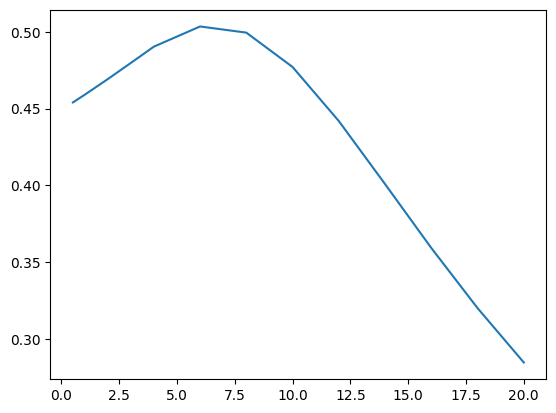

In [5]:
#решение прямой задачи
t_values = np.array([0.5, 0.5, 1, 1, 1, 2 ,2 , 2, 2, 2, 2 ,2 ,2])
gr = np.random.uniform(0.2, 0.4, size=1)[0]
sand = np.random.uniform(0.1, 0.3, size=50)[0]
phi2 = np.zeros(100, dtype=float)
phi2[:lngth//2] = gr
phi2[lngth//2:lngth] = sand
solutions = solve_system_vect(t_values, phi)
print(solutions)
lqo = []
for i in solutions:
    lqo.append(qo_func(i, np.array([0.6]*lngth)))
lqo = np.array(lqo)
#вывод дебита нефти
plt.plot(np.cumsum(t_values), -1 * lqo)
plt.title("Дебит нефти")
plt.xlabel("Время")
plt.ylabel("Дебит")
plt.grid(True)
plt.show()


In [ ]:
#вывод давления и насыщенности нефти для проверки адекватности разработчиков при введении нелинейки  
time_indices = [0, 5, 9]
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
for i, index in enumerate(time_indices):
    plt.plot(np.arange(100), solutions[index][:100], label=f'Давление при t={np.cumsum(t_values)[index]:.1f}')
plt.title('Давление в зависимости от t')
plt.ylabel('Давление', fontsize=15)
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
for i, index in enumerate(time_indices):
    plt.plot(np.arange(100), 1 - solutions[index][100:200], label=f'S_o при t={np.cumsum(t_values)[index]:.1f}')
plt.title('Насыщенность нефти в зависимости от t')
plt.ylabel('Насыщенность', fontsize=15)
plt.xlabel('Координата', fontsize=15)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
time_indices = [0, 5, 9]
plt.figure(figsize=(15, 10))
for i, index in enumerate(time_indices):
    plt.subplot(3, 2, 2*i+1)
    plt.plot(np.arange(100), solutions[index][:100], label=f'Давление при t={t_values[index]:.1f}')
    plt.title(f'Давление в зависимости от t={t_values[index]:.1f}')
    plt.ylabel('Давление')
    plt.grid()
    plt.legend()
for i, index in enumerate(time_indices):
    plt.subplot(3, 2, 2*i+2)
    plt.plot(np.arange(100), 1 - solutions[index][100:200], label=f'S_wn1 при t={t_values[index]:.1f}')  # S_wn1 начинается с 100-го элемента
    plt.title(f'Насыщенность в зависимости от t={t_values[index]:.1f}')
    plt.ylabel('Насыщенность')
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()


In [14]:
#генерация данных для первой задачи (гравий,песок ,известная граница(посередине))
def generate_data(n=10000):
    data = np.zeros((n, 15), dtype=float)
    for i in range(n):
        gr = np.random.uniform(0.2, 0.4, size=1)[0]
        sand = np.random.uniform(0.1, 0.3, size=50)[0]
        t_values = np.array([0.5, 0.5, 1, 1, 1, 2 ,2 , 2, 2, 2, 2 ,2 ,2])
        phi_s = np.concatenate([np.array([gr]*(lngth//2)), np.array([sand]*(lngth//2))])
        solutions = solve_system_vect(t_values, phi_s)
        lqo = []
        for j in solutions:
            lqo.append(qo_func(j, np.array([0.6]*lngth)))
        lqo = np.array(lqo)
        data[i][:13] = -1*lqo
        data[i][-2] = gr
        data[i][-1] = sand
    return data
np.savetxt("data1000.csv", generate_data(1000), delimiter=",")
df = pd.read_csv('data1000.csv',header=None)
df.columns = df.columns.astype(str)
df

<timed exec>:13: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
<timed exec>:13: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.


In [29]:
#обработка входных данных и обучение модели для первой задачи
y_val = df.iloc[:, 13:]
X_data = df.iloc[:, :13]
X_data
y_val
X_train, X_test, y_train, y_test = train_test_split(X_data, y_val, test_size=0.3, random_state=101)
y_train
models = [RandomForestRegressor(n_estimators=100, max_features='sqrt')]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
TestModels
X_test
y_test
m_data = []
for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        m_data.append(model.predict(X_test)[0])
m_data
y_test.iloc[0]
y_test.iloc[0][0]
phis_test = np.concatenate([np.array([y_test.iloc[0][0]]*50), np.array([y_test.iloc[0][1]]*50)])
phis_test
phis = np.concatenate([np.array([m_data[0]]*50), np.array([m_data[1]]*50)])
#вывод сравнения численного метода и машинного обучения 
plt.plot(range(100), phis, label="Машинное обучение")
plt.plot(range(100), phis_test, label="Численный метод")
plt.xlabel("Номер ячейки")
plt.ylabel("Пористость ячейки")
plt.legend(loc=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.454855,0.460518,0.471320,0.478316,0.477387,0.439494,0.383113,0.324863,0.272710,0.228828,0.192847,0.163593,0.139806
1,0.454910,0.460634,0.472223,0.481958,0.486438,0.461869,0.413851,0.358436,0.305664,0.259529,0.220728,0.188612,0.162153
2,0.457686,0.466186,0.480494,0.484313,0.472430,0.407039,0.333870,0.269543,0.217727,0.177235,0.145784,0.121253,0.101948
3,0.458482,0.467825,0.486525,0.500497,0.503776,0.462719,0.398675,0.333385,0.276215,0.229145,0.191279,0.160986,0.136688
4,0.458172,0.467193,0.483450,0.490596,0.482691,0.421891,0.349477,0.284005,0.230458,0.188227,0.155229,0.129380,0.108973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.456614,0.464029,0.476785,0.480996,0.471617,0.412538,0.343105,0.280121,0.228273,0.187114,0.154766,0.129302,0.109116
996,0.458834,0.468506,0.484074,0.486566,0.471075,0.398614,0.322018,0.256932,0.205680,0.166263,0.136009,0.112624,0.094352
997,0.455288,0.460733,0.473101,0.485393,0.495975,0.493577,0.464683,0.419507,0.369374,0.321320,0.278412,0.241408,0.210002
998,0.457215,0.465262,0.480605,0.489761,0.486983,0.437151,0.370440,0.306328,0.251868,0.207807,0.172747,0.144906,0.122694


In [20]:
#сравнение результатов нескольких моделей для выявления лучшей
models = [LinearRegression(), RandomForestRegressor(n_estimators=100, max_features='sqrt'), RandomForestRegressor(n_estimators=100, max_features='log2'), KNeighborsRegressor(n_neighbors=6)]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
TestModels
TestModels.mean()

,LinearRegression(),RandomForestRegressor(max_features='sqrt'),RandomForestRegressor(max_features='log2'),KNeighborsRegressor(n_neighbors=6)
Y1,0.010749,0.002931,0.002985,0.018352
Y2,0.018181,0.008963,0.009111,0.029148


In [53]:
#генерация данных для второй задачи(гравий,песок,неизвестная граница)
def generate_data(n=10000):
    data = np.zeros((n, 16), dtype=float)
    for i in range(n):
        border = np.random.randint(20, 80)
        gr = np.random.uniform(0.2, 0.4, size=1)[0]
        sand = np.random.uniform(0.1, 0.3, size=50)[0]
        t_values = np.array([0.5, 0.5, 1, 1, 1, 2 ,2 , 2, 2, 2, 2 ,2 ,2])
        phi_s = np.concatenate([np.array([gr]*border), np.array([sand]*(lngth-border))])
        solutions = solve_system_vect(t_values, phi_s)
        lqo = []
        for j in solutions:
            lqo.append(qo_func(j, np.array([0.6]*lngth)))
        lqo = np.array(lqo)
        data[i][:13] = -1*lqo
        data[i][-3] = gr
        data[i][-2] = sand
        data[i][-1] = border
    return data
np.savetxt("data_5000.csv", generate_data(5000), delimiter=",")
df2 = pd.read_csv('data_5000.csv',header=None)
df2

NameError: name 'lngth' is not defined

In [52]:
#сравнение результатов моделей для второй задачи для поиска лучшей
df = pd.read_csv('data_5000.csv',header=None)
df = df.iloc[:3000, :]
df.columns = df.columns.astype(str)
X_data = df.iloc[:,:13]
y_val = df.iloc[:, -3:]
y_val["15"] = y_val["15"].div(100)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_val, test_size=0.3, random_state=101)
models = [LinearRegression(), RandomForestRegressor(n_estimators=100, max_features='sqrt'), KNeighborsRegressor(n_neighbors=6), SVR(kernel='linear')]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
TestModels
TestModels.mean()
df

<ipython-input-52-29e8e45e433f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_val["15"] = y_val["15"].div(100)


,LinearRegression(),RandomForestRegressor(max_features='sqrt'),KNeighborsRegressor(n_neighbors=6),SVR(kernel='linear')
Y1,2.669483e-01,2.360953e-02,5.277152e-02,1.810226e-01
Y2,1.369186e+01,1.351489e-01,1.563178e-01,2.917178e-01
Y3,2.126142e+16,2.236638e+13,2.223444e+13,3.913412e+13


In [98]:
#обучение лучшей модели для второй задачи
df = pd.read_csv('data_3000.csv',header=None)
df.columns = df.columns.astype(str)
X_data = df.iloc[:,:13]
y_val = df.iloc[:, 13:]
y_val["15"] = y_val["15"].div(100)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_val, test_size=0.33, random_state=101)
models = [ RandomForestRegressor(n_estimators=99, max_features='log2')]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
print(TestModels)
print(TestModels.mean())
m_data = []
for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        m_data.append(model.predict(X_test)[0])
m_data
a1 = np.array([m_data[0]]*int(100*m_data[-1]))
a2 = np.array([m_data[1]]*int(100*(1-m_data[-1]) + 1))
phis1 = np.concatenate((a1, a2))
phis1
phis1.shape
phis_test = np.concatenate([np.array([y_test.iloc[0][0]]*int(100*y_test.iloc[0][-1])), np.array([y_test.iloc[0][1]]*int(100-100*y_test.iloc[0][-1]))])
phis_test
phis_test.shape
#сравнение численного метода и машинного обучения для второй задачи
plt.plot(range(100), phis1, label="Машинное обучение")
plt.plot(range(100), phis_test, label="Численный метод")
plt.xlabel("Номер ячейки")
plt.ylabel("Пористость ячейки")
plt.legend(loc=1)

<ipython-input-98-635e7e1b50f9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_val["15"] = y_val["15"].div(100)


    RandomForestRegressor(max_features='log2', n_estimators=99)
Y1                                           0.005101          
Y2                                           0.088544          
Y3                                           0.227370          
RandomForestRegressor(max_features='log2', n_estimators=99)    0.107005
dtype: float64


In [17]:
#генерация данных для третьей задачи (гравий,песок,глина,неизвестные границы)
def generate_data(n=10000):
    data = np.zeros((10000, 18), dtype=float)
    for i in range(n):
        border1 = np.random.randint(11, 31)
        border2 = np.random.randint(border1, 61)
        gr = np.random.uniform(0.2, 0.4, size=1)[0]
        sand = np.random.uniform(0.1, 0.3, size=50)[0]
        clay = np.random.uniform(0.01, 0.2, size=1)[0]
        t_values = np.array([0.5, 0.5, 1, 1, 1, 2 ,2 , 2, 2, 2, 2 ,2 ,2])
        phi_s = np.concatenate([np.array([gr]*border1), np.array([sand]*(border2-border1)), np.array([clay]*(lngth-border2))])
        solutions = solve_system_vect(t_values, phi_s)
        lqo = []
        for j in solutions:
            lqo.append(qo_func(j, np.array([0.6]*lngth)))
        lqo = np.array(lqo)
        data[i][:13] = -1*lqo
        data[i][-5] = gr
        data[i][-4] = sand
        data[i][-3] = clay
        data[i][-2] = border1
        data[i][-1] = border2
    return data
np.savetxt("data_10000.csv", generate_data(10000), delimiter=",")

<timed exec>:13: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
<timed exec>:13: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.


KeyboardInterrupt: 

In [112]:
#обучение модели для третьей задачи
df = pd.read_csv('data_10000.csv',header=None)
df.columns = df.columns.astype(str)
X_data = df.iloc[:,:13]
y_val = df.iloc[:, -5:]
y_val["16"] = y_val["16"].div(100)
y_val["17"] = y_val["17"].div(100)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_val, test_size=0.33, random_state=101)
models = [ RandomForestRegressor(n_estimators=99, max_features='log2')]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
print(TestModels)
print(TestModels.mean())
m_data = []
for j in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, j])
        m_data.append(model.predict(X_test)[2])
m_data
a1 = np.array([m_data[0]]*int(100*m_data[-2]))
a2 = np.array([m_data[1]]*int(100*(m_data[-1]-m_data[-2])))
a3 = np.array([m_data[2]]*(int(100-100*m_data[-1])+2))
phis1 = np.concatenate((a1, a2, a3))
phis1
phis1.shape
y_test.iloc[2]
100*(y_test.iloc[0][-1]-y_test.iloc[0][-2])
phis_test = np.concatenate([np.array([y_test.iloc[2][0]]*int(100*y_test.iloc[2][-2])), np.array([y_test.iloc[2][1]]*int(100*(y_test.iloc[2][-1]-y_test.iloc[2][-2]))), np.array([y_test.iloc[2][2]]*int(100-100*y_test.iloc[2][-1] + 1))])
phis_test
phis_test.shape
#сравнение численного метода и машинного обучения для третьей задачи
plt.plot(range(100), phis1, label="Машинное обучение")
plt.plot(range(100), phis_test, label="Численный метод")
plt.xlabel("Номер ячейки")
plt.ylabel("Пористость ячейки")
plt.legend(loc=1)

<ipython-input-112-7fb8270b5460>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_val["16"] = y_val["16"].div(100)
<ipython-input-112-7fb8270b5460>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_val["17"] = y_val["17"].div(100)


    RandomForestRegressor(max_features='log2', n_estimators=99)
Y1                                           0.012471          
Y2                                           0.213630          
Y3                                           0.125312          
Y4                                           0.207788          
Y5                                           0.244238          
RandomForestRegressor(max_features='log2', n_estimators=99)    0.160688
dtype: float64


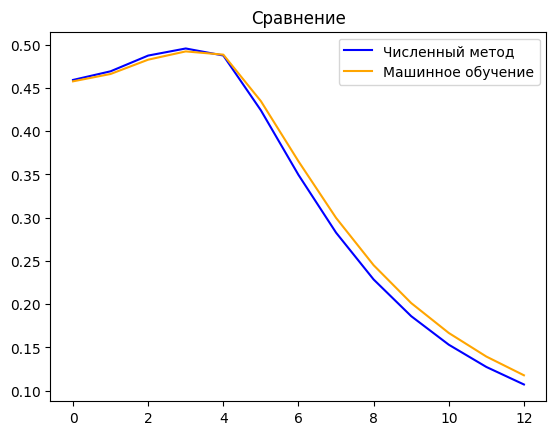

In [37]:
#сравнение численного метода и машинного обучения при рассмотрении дебита нефти
lqo2 = -1 * lqo
plt.plot(range(13), lqo2, color='blue', label='Численный метод')
plt.plot(range(13), X_test.iloc[11047, :], color='orange', label='Машинное обучение')
plt.legend()
plt.title('Сравнение')
plt.show()


In [25]:
#это должно было быть основной функцией для обучения моделей,но у судьбы были другие планы
def training(X_train, X_test, y_train, y_test):
    rng = list(range(50, 150, 5))

    TestModels = pd.DataFrame()
    best_first_model = RandomForestRegressor(n_estimators=100, max_features='sqrt')
    best_first_model.fit(X_train, y_train.iloc[:, j])
    best_score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))
    for i in rng:
        model = RandomForestRegressor(n_estimators=i, max_features='sqrt')
        model_name = str(model)
        best_score =

        for j in range(3):
            model.fit(X_train, y_train.iloc[:, j])
            score = mean_absolute_percentage_error(y_test.iloc[:, j], model.predict(X_test))


        tmp = pd.DataFrame({model_name: scores})
        TestModels = pd.concat([TestModels, tmp], axis=1)
    TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
    return TestModels

In [129]:
with open('tmp (1).npy', 'rb') as f:
    y_train = np.load(f)
    prod_rate_train = np.load(f)
    t_test = np.load(f)
    prod_rate_test = np.load(f)
prod_rate_train[0][:]
y_train.shape

In [133]:
#наивные попытки разработчиков улучшить результат предсказания в третьей задаче
X_train, X_test, y_train, y_test = pd.DataFrame(data=prod_rate_train), pd.DataFrame(data=prod_rate_test), pd.DataFrame(data=y_train), pd.DataFrame(data=t_test)
models = [RandomForestRegressor(n_estimators=101, max_features='log2')]
TestModels = pd.DataFrame()

for model in models:
    model_name = str(model)
    scores = []

    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train[:][j])
        score = mean_absolute_percentage_error(y_test[:][j], model.predict(X_test))
        scores.append(score)

    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)

TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]

TestModels
TestModels.mean()

,"RandomForestRegressor(max_features='log2', n_estimators=101)"
Y1,0.002870
Y2,0.109429
Y3,0.020856
Y4,0.164493
Y5,0.256237


In [79]:
#наивные попытки разработчиков улучшить результат предсказания в третьей задаче
X_train, X_test, y_train, y_test = pd.DataFrame(data=prod_rate_train), pd.DataFrame(data=prod_rate_test), pd.DataFrame(data=y_train), pd.DataFrame(data=t_test)
models = [RandomForestRegressor(n_estimators=99, max_features='log2')]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train[:][j])
        score = mean_absolute_percentage_error(y_test[:][j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
TestModels
TestModels.mean()

,"RandomForestRegressor(max_features='log2', n_estimators=99)"
Y1,0.002853
Y2,0.107363
Y3,0.021318
Y4,0.161000
Y5,0.255836


In [81]:
#наивные попытки разработчиков улучшить результат предсказания в третьей задаче
X_train, X_test, y_train, y_test = pd.DataFrame(data=prod_rate_train), pd.DataFrame(data=prod_rate_test), pd.DataFrame(data=y_train), pd.DataFrame(data=t_test)
models = [RandomForestRegressor(n_estimators=98, max_features='log2')]
TestModels = pd.DataFrame()
for model in models:
    model_name = str(model)
    scores = []
    for j in range(y_train.shape[1]):
        model.fit(X_train, y_train[:][j])
        score = mean_absolute_percentage_error(y_test[:][j], model.predict(X_test))
        scores.append(score)
    tmp = pd.DataFrame({model_name: scores})
    TestModels = pd.concat([TestModels, tmp], axis=1)
TestModels.index = [f'Y{i+1}' for i in range(y_train.shape[1])]
print(TestModels)
print(TestModels.mean())

    RandomForestRegressor(max_features='log2', n_estimators=98)
Y1                                           0.002857          
Y2                                           0.107995          
Y3                                           0.021365          
Y4                                           0.165039          
Y5                                           0.252676          
RandomForestRegressor(max_features='log2', n_estimators=98)    0.109986
dtype: float64
